ResNet50

ResNet50 introduced the concept of residual learning, enabling the training of extremely deep neural networks with improved accuracy and efficiency. ResNet50 features shortcut connections (skip connections) that facilitate the flow of gradients during training, mitigating the vanishing gradient problem. This architecture's depth allows it to capture intricate features, making it highly effective for tasks requiring detailed feature extraction.

In [ ]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install -U imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install split-folders

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import keras

In [ ]:
import splitfolders

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import metrics

from sklearn.utils import class_weight
from collections import Counter
from timeit import default_timer as timer
import matplotlib.pyplot as plt

import os
from os import listdir
from os.path import isfile, join

In [ ]:
os.makedirs('outputRe')
os.makedirs('outputRe/train')
os.makedirs('outputRe/val')


In [ ]:

img_loc = "C:/Users/Student/Documents/archive (1)"

splitfolders.ratio(img_loc, output='output', seed=1, ratio=(0.8, 0.2))

Copying files: 2750 files [00:02, 1280.82 files/s]


In [ ]:
!ls output

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
train_loc = 'output/train/'
test_loc = 'output/val/'

In [ ]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=train_loc, target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=test_loc, target_size=(224,224))

Found 2200 images belonging to 5 classes.
Found 550 images belonging to 5 classes.


In [ ]:
base_model = ResNet50(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 75, 75, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 38, 38, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 38, 38, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 38, 38, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 19, 19, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 19, 19, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 19, 19, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 10, 10, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 10, 10, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 10, 10, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 10, 10, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 10, 10, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 10, 10, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 10, 10, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 10, 10, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 10, 10, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 10, 10, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 5, 5, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 5, 5, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 5, 5, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 5, 5, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [ ]:
inputs = keras.Input(shape=(150, 150, 3))
x = base_model(inputs, training=False)

# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)

# Apply ReLU activation
x = keras.layers.Activation('relu')(x)

# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(5, activation ='softmax')(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Recall'])
start = timer()
history = model.fit(x=traindata,validation_data =testdata, workers = 7, epochs=100,shuffle=True)
#model.fit(train_g, epochs=100, validation_data=val_g, workers = 7)
end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/100
69/69 [==============================] - 78s 1s/step - loss: 1.0289 - accuracy: 0.6245 - recall: 0.4886 - val_loss: 0.8550 - val_accuracy: 0.6982 - val_recall: 0.5364
Epoch 2/100
69/69 [==============================] - 76s 1s/step - loss: 0.8332 - accuracy: 0.6891 - recall: 0.5745 - val_loss: 0.8134 - val_accuracy: 0.7164 - val_recall: 0.5655
Epoch 3/100
69/69 [==============================] - 75s 1s/step - loss: 0.7668 - accuracy: 0.7068 - recall: 0.6145 - val_loss: 0.8347 - val_accuracy: 0.6891 - val_recall: 0.6545
Epoch 4/100
69/69 [==============================] - 73s 1s/step - loss: 0.7457 - accuracy: 0.7077 - recall: 0.6227 - val_loss: 0.7679 - val_accuracy: 0.7236 - val_recall: 0.6436
Epoch 5/100
69/69 [==============================] - 75s 1s/step - loss: 0.7088 - accuracy: 0.7286 - recall: 0.6377 - val_loss: 0.7731 - val_accuracy: 0.7218 - val_recall: 0.6473
Epoch 6/100
69/69 [==============================] - 79s 1s/step - loss: 0.6906 - accuracy: 0.7355 - reca

69/69 [==============================] - 73s 1s/step - loss: 0.3599 - accuracy: 0.8750 - recall: 0.8259 - val_loss: 0.7913 - val_accuracy: 0.7255 - val_recall: 0.6909
Epoch 47/100
69/69 [==============================] - 73s 1s/step - loss: 0.3633 - accuracy: 0.8623 - recall: 0.8259 - val_loss: 0.7606 - val_accuracy: 0.7436 - val_recall: 0.7127
Epoch 48/100
69/69 [==============================] - 74s 1s/step - loss: 0.3519 - accuracy: 0.8791 - recall: 0.8409 - val_loss: 0.7907 - val_accuracy: 0.7036 - val_recall: 0.6600
Epoch 49/100
69/69 [==============================] - 73s 1s/step - loss: 0.3541 - accuracy: 0.8768 - recall: 0.8350 - val_loss: 0.7389 - val_accuracy: 0.7473 - val_recall: 0.6964
Epoch 50/100
69/69 [==============================] - 73s 1s/step - loss: 0.3387 - accuracy: 0.8795 - recall: 0.8391 - val_loss: 0.7591 - val_accuracy: 0.7255 - val_recall: 0.6818
Epoch 51/100
69/69 [==============================] - 73s 1s/step - loss: 0.3414 - accuracy: 0.8768 - recall: 0.8

69/69 [==============================] - 73s 1s/step - loss: 0.2338 - accuracy: 0.9277 - recall: 0.9036 - val_loss: 0.8235 - val_accuracy: 0.7364 - val_recall: 0.7091
Epoch 92/100
69/69 [==============================] - 73s 1s/step - loss: 0.2307 - accuracy: 0.9264 - recall: 0.9023 - val_loss: 0.8354 - val_accuracy: 0.7291 - val_recall: 0.6945
Epoch 93/100
69/69 [==============================] - 73s 1s/step - loss: 0.2363 - accuracy: 0.9245 - recall: 0.8977 - val_loss: 0.8315 - val_accuracy: 0.7382 - val_recall: 0.7200
Epoch 94/100
69/69 [==============================] - 73s 1s/step - loss: 0.2254 - accuracy: 0.9300 - recall: 0.9045 - val_loss: 0.8448 - val_accuracy: 0.7291 - val_recall: 0.6818
Epoch 95/100
69/69 [==============================] - 73s 1s/step - loss: 0.2324 - accuracy: 0.9245 - recall: 0.9005 - val_loss: 0.8506 - val_accuracy: 0.7309 - val_recall: 0.7055
Epoch 96/100
69/69 [==============================] - 73s 1s/step - loss: 0.2268 - accuracy: 0.9277 - recall: 0.9

In [ ]:
model.save('resnet-elu.h5')

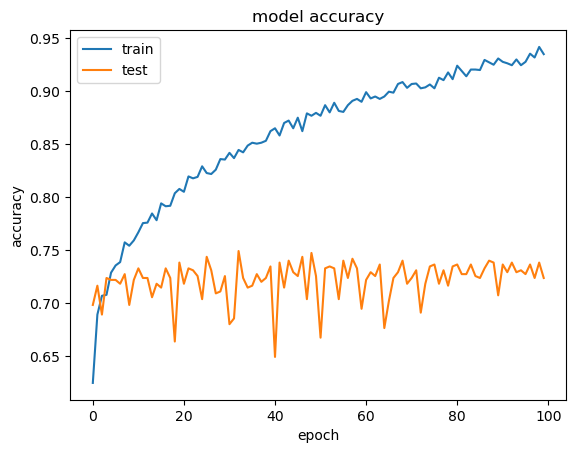

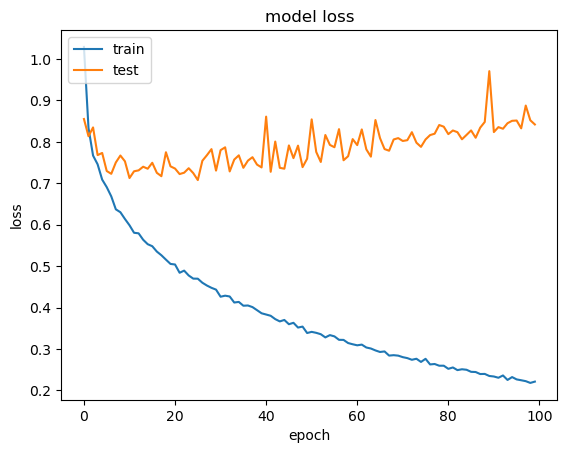

In [ ]:
import matplotlib.pyplot as plt
from keras.models import load_model


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()